In [2]:
from bs4 import BeautifulSoup as bs
import os
import pandas as pd

In [71]:
def cleanRating(s):
    if ("[0 deals]" in s):
        return ',0
    s = s.replace('\xa0','')
    splited = s.split('/')
    grade = splited[0].replace('~','')
    grade = grade.replace(' ','')
    numDeals = splited[1].replace('5, ','')
    numDeals = numDeals.replace(' deals','')
    return grade , numDeals

In [76]:
def cleanLastSeen(s):
    s = s.replace('\n','')
    s = s.replace('Last seen','')
    s = s.replace('ago.','')
    return s.strip()

In [77]:
vendors = pd.DataFrame(columns=['name', 'rating','lastSeen', 'publicKey', '#products','#Deals'])

directory = "data/agora/2014-04-06/vendor"
for entry in os.scandir(directory):
    with open(entry.path) as fp:
        soup = bs(fp)
        name = None
        rating = None
        publicKey = None
        status = None
        
        middleStuff = soup.find("div", id="middlestuff")
        strongText = middleStuff.find_all('strong')
        ratingRaw = middleStuff.find_all("span",class_="gen-user-ratings")
        name = strongText[0].text
        if len(ratingRaw)>0 :
            #numDeals = 0
            #rating = ratingRaw[0].text
            #print(cleanRating(rating))
            rating,numDeals = cleanRating(ratingRaw[0].text)
            
        key = middleStuff.find_all("span",class_="pgptoken")
        if len(key)>0:
            publicKey = key[0].text
        statusDiv = middleStuff.find_all("div",class_="vendorbio-stats-online")
        if len(statusDiv) >0:
            status = cleanLastSeen(statusDiv[0].text)
        products = middleStuff.find_all("tr",class_="products-list-item")
        
        new_row = {'name':name, 'rating':rating,'lastSeen':status, 'publicKey':publicKey, '#products':len(products), '#Deals':numDeals}
        vendors = vendors.append(new_row, ignore_index=True)



In [86]:
vendors.head(30)

,name,rating,lastSeen,publicKey,#products,#Deals
0,aneaglemum,5,1 days 2 hours,-----BEGIN PGP PUBLIC KEY BLOCK-----Version: G...,2,1~2
1,pinocchio,4.78,0 hours,-----BEGIN PGP PUBLIC KEY BLOCK-----Version: G...,34,150~200
2,GrandWizardsLair,4.97,6 hours,-----BEGIN PGP PUBLIC KEY BLOCK-----Comment: G...,3,25~40
3,Rebel_Alliance,4.98,2 hours,-----BEGIN PGP PUBLIC KEY BLOCK-----mQINBFLdik...,4,40~55
4,Sir-ACAB,5,4 days,-----BEGIN PGP PUBLIC KEY BLOCK-----Version: G...,1,6~10
5,_drugs.inc_,5,2 months 16 days,-----BEGIN PGP PUBLIC KEY BLOCK-----mQINBFLQEl...,18,1~2
6,cossacks,5.00,9 hours,-----BEGIN PGP PUBLIC KEY BLOCK-----Version: G...,3,6~10
7,SeattlesBest,4.98,0 hours,-----BEGIN PGP PUBLIC KEY BLOCK-----Version: G...,25,70~100
8,checkpoint,null,1 hours,-----BEGIN PGP PUBLIC KEY BLOCK-----Version: G...,4,0
9,Top_Gear_UK,4.99,5 hours,-----BEGIN PGP PUBLIC KEY BLOCK-----Version: G...,16,70~100


In [87]:
len(vendors)

797

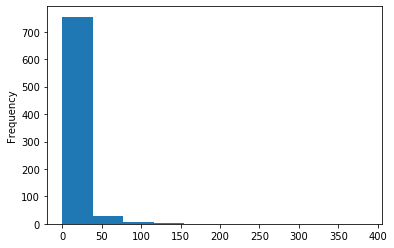

In [85]:
vendors['#products'].plot.hist()

In [89]:
vendors['rating'].plot.hist()

TypeError: no numeric data to plot